<a href="https://colab.research.google.com/github/Bino-01/Air-Line-Passengers/blob/master/LabWk5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Creating a DataFrame df
df = pd.read_csv('/content/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
# Plotting the Dataset
"""
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8), dpi =100)
plt.xlabel('Month')
plt.ylabel('Passengers Number')
plt.title('Air Passengers')
plt.plot(df)
plt.show()

"""

"\nplt.style.use('fivethirtyeight')\nplt.figure(figsize=(12, 8), dpi =100)\nplt.xlabel('Month')\nplt.ylabel('Passengers Number')\nplt.title('Air Passengers')\nplt.plot(df)\nplt.show()\n\n"

In [5]:
# renaming the Columns
df.columns = ['Month', 'Passengers Number']
df

,Month,Passengers Number
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
# Data Manipoulation
df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              144 non-null    object
 1   Passengers Number  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              144 non-null    object
 1   Passengers Number  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df.shape

(144, 2)

In [9]:
df.describe
df.describe()

,Passengers Number
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [10]:
df.iloc[3:8]

,Month,Passengers Number
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148


In [11]:
df.iloc[5]

,5
Month,1949-06
Passengers Number,135


In [12]:
# Setting <Month as Index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df

,Passengers Number
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


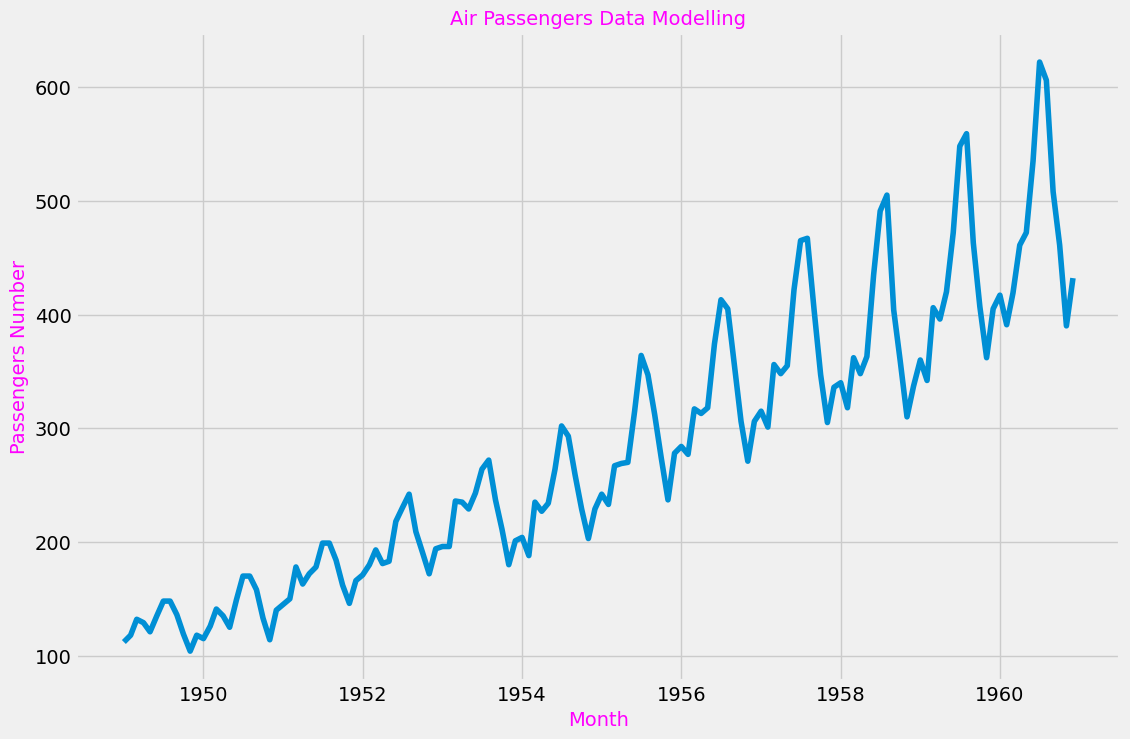

In [13]:
# Plotting the Dataset
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8), dpi =100) # dpi (dot per inch) graph resolution
plt.xlabel('Month', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':14})
plt.ylabel('Passengers Number', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':14})
plt.title('Air Passengers Data Modelling', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':14})
plt.plot(df)
plt.show()

In [14]:
# Let's Predict - Splitting the Dataset betweeen Training and Testing Set
#train_len = int(len(df)*0.8) # 20 % remaining will be the testing set
train_len=int(len(df)*0.75) # 25 % remaining will be the testing set
train = df.iloc[:train_len]
test = df.iloc[train_len:]

In [15]:
# Let Predict
y_hat_MA= test.copy()
window = 12 # Window shift to use the whole dataset
y_hat_MA['moving_avg_forecast'] = train['Passengers Number'].rolling(window).mean().iloc[-1]


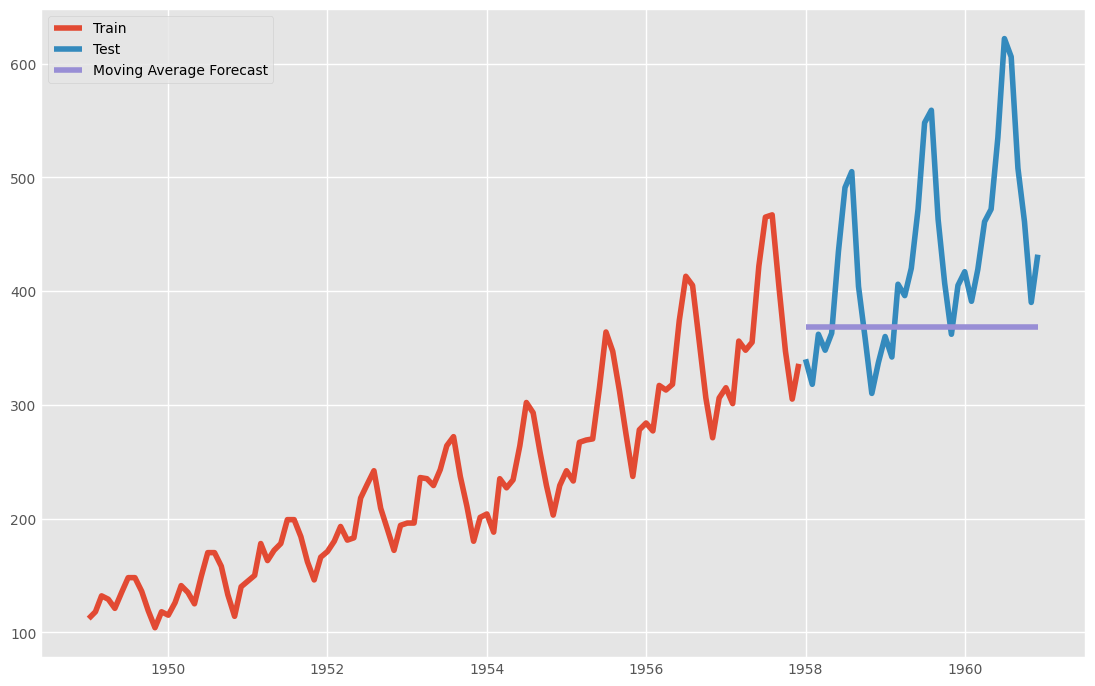

In [16]:
# Let's do the Plotting
plt.style.use('ggplot')
plt.figure(figsize=(12, 8), dpi =100)
plt.plot(train['Passengers Number'], label='Train')
plt.plot(test['Passengers Number'], label='Test')
plt.plot(y_hat_MA['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [17]:
print(y_hat_MA.iloc[3])

Passengers Number      348.000000
moving_avg_forecast    368.416667
Name: 1958-04-01 00:00:00, dtype: float64


In [18]:
# Error Calculation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers Number'], y_hat_MA['moving_avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers Number']- y_hat_MA['moving_avg_forecast']) /test['Passengers Number'])*100,2)
mae = np.round(np.mean(np.abs(test['Passengers Number'] - y_hat_MA['moving_avg_forecast'])),2)

In [19]:
# Let's import the main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Visualisation of the Plots
import seaborn as sns           # Statistical Visualisation

In [20]:
# Let's read the Dataset / Creating the DataFrame
df = pd.read_csv('/content/AirPassengers.csv')
df


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [21]:
# Let's do some data Wrangling
df.shape
df.info
df.info()
df.describe
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [22]:
# Remaining the Columns
df.columns = ['Month', 'Passengers Number']
df

,Month,Passengers Number
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [23]:
# Let's Use Month as Index
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
df.set_index('Month', inplace = True)
df

/tmp/ipython-input-1839685688.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)


,Passengers Number
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


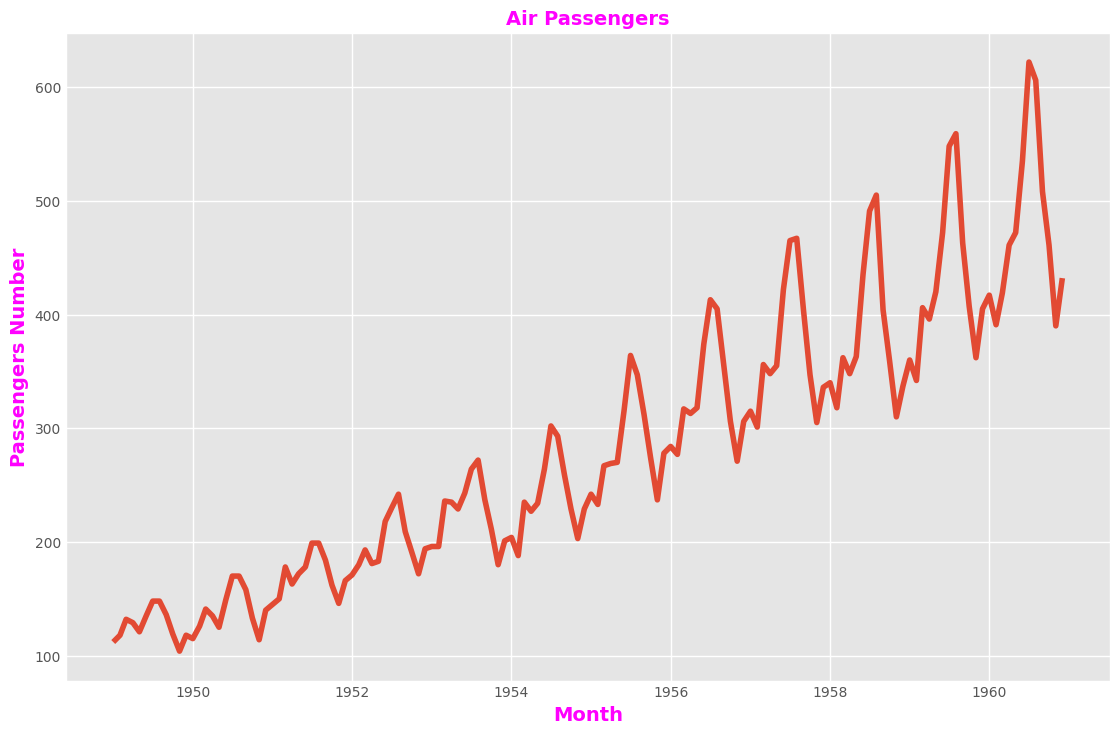

In [24]:
#Let's plot the TS Air Passenger DataSet
plt.style.use('ggplot')
plt.figure(figsize=(12, 8), dpi =100)
plt.xlabel('Month', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.ylabel('Passengers Number', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.title('Air Passengers', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.plot(df)
plt.show()

In [25]:
# For us to use the ARIMA model, we need to carry out 2 test, that the Dickey Fuller test KPSS test to find out whether the model is Stationary or nor
from statsmodels.tsa.stattools import adfuller, kpss
adfuller_test = adfuller(df['Passengers Number'], autolag='AIC') # Akaike Information Criterion
print('ADF p-value', adfuller_test[1]) # p-value > 0.05 ===> Non-stationary
kpss_test = kpss(df['Passengers Number'], regression='c', nlags='auto')
print('KPSS p-value', kpss_test[1]) # p-value < 0.05 === > Non-stationary

"""
1- In these cases we can apply ARIMA = AutoRegressive Integrated Moving Average
2- mWe will have to fdefine the value p,d,q defining the type of ARIMA (p,d,q) where AR(p), I(d) and MA(q)
"""



ADF p-value 0.991880243437641
KPSS p-value 0.01


/tmp/ipython-input-3544637485.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df['Passengers Number'], regression='c', nlags='auto')


'\n1- In these cases we can apply ARIMA = AutoRegressive Integrated Moving Average\n2- mWe will have to fdefine the value p,d,q defining the type of ARIMA (p,d,q) where AR(p), I(d) and MA(q)\n'

<Figure size 1800x1200 with 0 Axes>

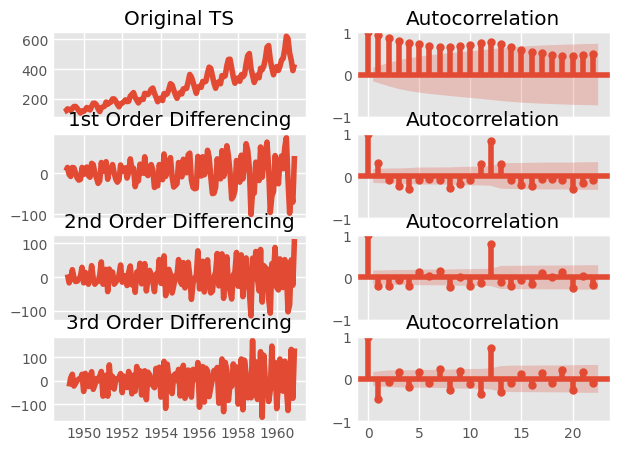

In [26]:
# Let do thge Differencing to make the model sationary
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure (figsize=(12, 8), dpi =150)
# Let's polot the Original TS
fig, axes = plt.subplots(4,2, sharex='col')
axes[0,0].plot(df['Passengers Number']), axes[0,0].set_title('Original TS')
plot_acf(df['Passengers Number'], ax=axes[0,1])
# let's do the 1st order differencing
axes[1,0].plot(df['Passengers Number'].diff()), axes[1,0].set_title('1st Order Differencing')
plot_acf(df['Passengers Number'].diff().dropna(), ax=axes[1,1])
# Let's plot the 2nd order Differencing
axes[2,0].plot(df['Passengers Number'].diff().diff()), axes[2,0].set_title('2nd Order Differencing')
plot_acf(df['Passengers Number'].diff().diff().dropna(), ax=axes[2,1])
# Let's plot the 3rd order Differencing
axes[3,0].plot(df['Passengers Number'].diff().diff().diff()), axes[3,0].set_title('3rd Order Differencing')
plot_acf(df['Passengers Number'].diff().diff().diff().dropna(), ax=axes[3,1])

plt.plot()
plt.show()
# From the differencing we find out that the TS is stationary after 1st diferencing, therefore d = 1


<Figure size 1440x960 with 0 Axes>

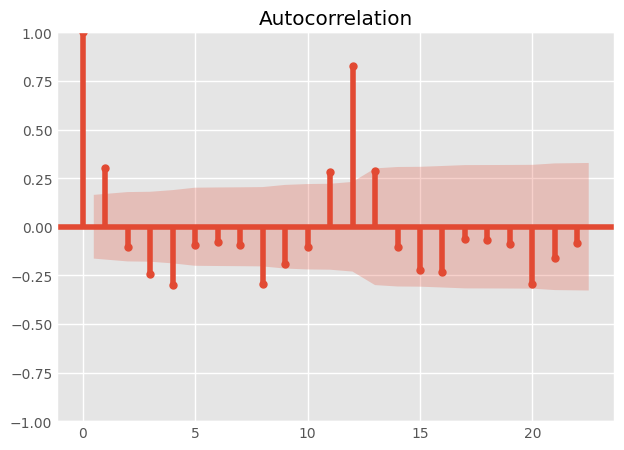

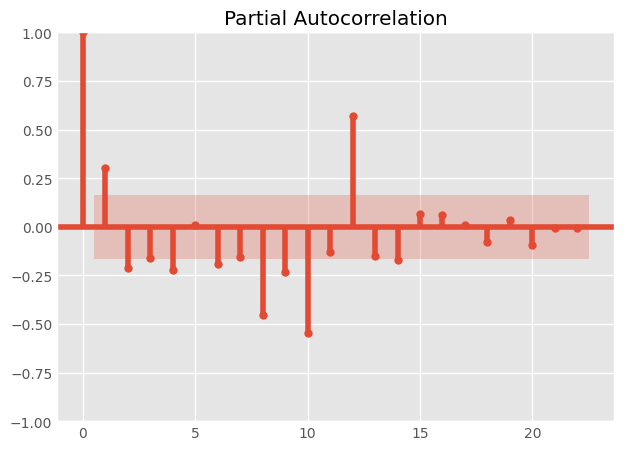

In [27]:
# Let's plot the Autocorrelation and Partial Autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 8), dpi =120)
plot_acf(df['Passengers Number'].diff().dropna()) # Only 6 lag is significant q =1, ... 6
plot_pacf(df['Passengers Number'].diff().dropna()) # Only 7 lags are significant p= 1, ...7
plt.show()
# NB: we will always start by using the small values of p, d, q
# Thetrefore the ARIMA (p, d, q) model will be ARIMA (1,1,0), ARIMA(0,1,1), ARIMA(1,1,1), ..., AIMA(2,1,0), ...

In [28]:
from logging import warning
# Let's model the ARIMA(p,d,q)
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Passengers Number'], order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

"""
NB: The statistics generated allow us to ascertain that
1) Using the Akaike Information Criterion (AIC) the ARIMA model fit the data
2) Using the Bayesian Information Criterion (BIC) the ARIMA model deals adequately with complexity
3)Using the Hannan Quinn Information Criterion (HQIC) the ARIMA model can select between different models
In additioin the smaller the 3 values the better

"""


                               SARIMAX Results                                
Dep. Variable:      Passengers Number   No. Observations:                  144
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -696.629
Date:                Wed, 21 Jan 2026   AIC                           1397.258
Time:                        09:39:56   BIC                           1403.183
Sample:                    01-01-1949   HQIC                          1399.665
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4027      0.077      5.252      0.000       0.252       0.553
sigma2       996.0870    108.453      9.184      0.000     783.522    1208.652
Ljung-Box (L1) (Q):                   0.07   Jarque-

'\nNB: The statistics generated allow us to ascertain that\n1) Using the Akaike Information Criterion (AIC) the ARIMA model fit the data\n2) Using the Bayesian Information Criterion (BIC) the ARIMA model deals adequately with complexity\n3)Using the Hannan Quinn Information Criterion (HQIC) the ARIMA model can select between different models\nIn additioin the smaller the 3 values the better\n\n'

In [29]:
# Creating the 2nd ARIMA model
model = ARIMA(df['Passengers Number'], order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:      Passengers Number   No. Observations:                  144
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -698.926
Date:                Wed, 21 Jan 2026   AIC                           1401.852
Time:                        09:39:56   BIC                           1407.778
Sample:                    01-01-1949   HQIC                          1404.260
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3066      0.080      3.849      0.000       0.150       0.463
sigma2      1029.2429    103.738      9.922      0.000     825.920    1232.566
Ljung-Box (L1) (Q):                   0.66   Jarque-

In [30]:
# creating the 3rd ARIMA
model = ARIMA(df['Passengers Number'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      Passengers Number   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Wed, 21 Jan 2026   AIC                           1394.683
Time:                        09:39:57   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

In [31]:
from scipy.stats import order_statistic
import warnings
warnings.filterwarnings('ignore')
# Comparing the ARIMAs in one go
from statsmodels.tsa.arima.model import ARIMA

orders = [(0,1,1), (1,1,0), (1,1,1), (2,1,0), (0,1,2), (3,1,0), (0,1,3), (1,1,2), (2,1,1)]
for order in orders:
    try:
        model = ARIMA(df, order=order)
        model_fit = model.fit()
        print(f'ARIMA{order}: AIC={model_fit.aic:.3f}, BIC={model_fit.bic:.3f}, HQIC={model_fit.hqic:.3f}')
    except Exception as e:
        print(f"ARIMA{order} failed:{e}")

# From the metrics generated, ARIMA(2,1,1) appears as the best model that we are going to use for prediction

ARIMA(0, 1, 1): AIC=1397.258, BIC=1403.183, HQIC=1399.665
ARIMA(1, 1, 0): AIC=1401.852, BIC=1407.778, HQIC=1404.260
ARIMA(1, 1, 1): AIC=1394.683, BIC=1403.571, HQIC=1398.294
ARIMA(2, 1, 0): AIC=1396.588, BIC=1405.476, HQIC=1400.200
ARIMA(0, 1, 2): AIC=1397.093, BIC=1405.982, HQIC=1400.705
ARIMA(3, 1, 0): AIC=1395.021, BIC=1406.872, HQIC=1399.837
ARIMA(0, 1, 3): AIC=1394.909, BIC=1406.761, HQIC=1399.725
ARIMA(1, 1, 2): AIC=1385.498, BIC=1397.349, HQIC=1390.313
ARIMA(2, 1, 1): AIC=1378.338, BIC=1390.190, HQIC=1383.154


In [32]:
# Let's split the Dataset between training and testing set
tot = len(df)
win = 12
diff = tot - win

In [37]:
# Still Splitting the Dataset
tot = len(df)
num_obs_ahead = 12
diff = tot - num_obs_ahead
train = df[:diff]
test = df[diff:]

In [40]:
# Determination of the Predicted values
model =ARIMA(train['Passengers Number'], order=(2,1,1))
fit = model.fit()


forecast = model_fit.forecast(steps=num_obs_ahead, alpha = 0.05)
confins = fit.get_forecast(steps=num_obs_ahead).summary_frame()

# Defining Boundaries: Lower and Upper Boundaries
forecast_val = pd.Series(forecast, index = test.index)
lower_bound = pd.Series(confins['mean_ci_lower'], index = test.index)
upper_bound = pd.Series(confins['mean_ci_upper'], index = test.index)


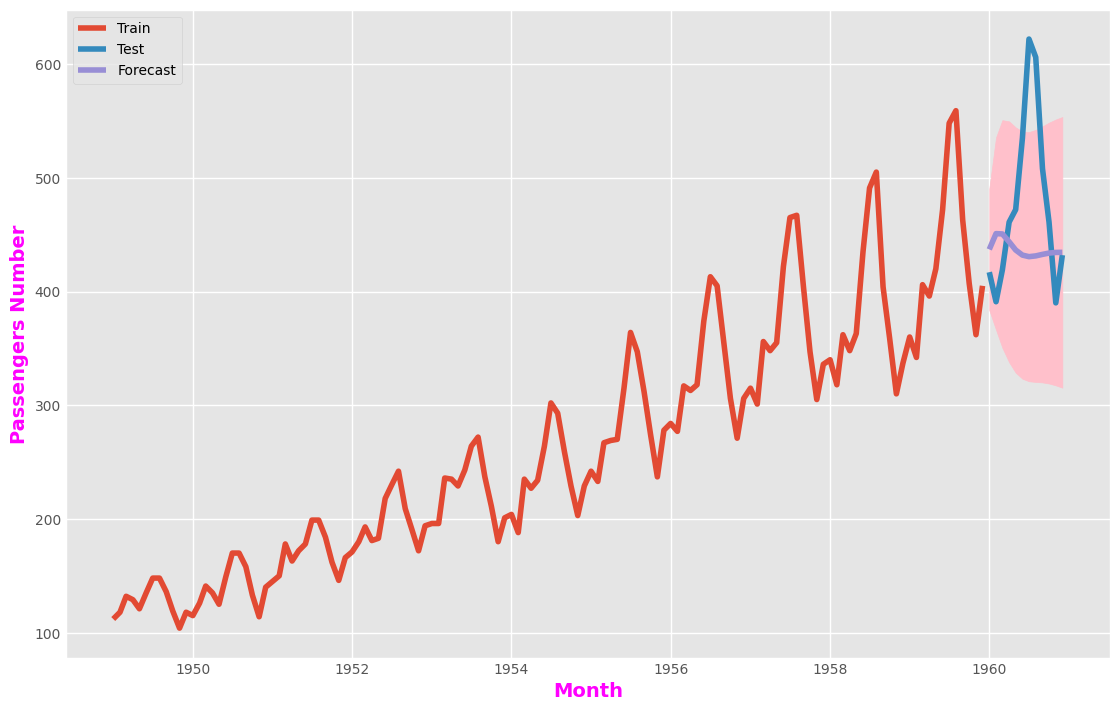

In [41]:
# Let's now Carry out someForecasting
plt.style.use('ggplot')
plt.figure(figsize=(12, 8), dpi =100)
plt.plot(train['Passengers Number'], label='Train')
plt.plot(test['Passengers Number'], label='Test')
plt.xlabel('Month', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.ylabel('Passengers Number', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.plot(forecast_val, label='Forecast')
plt.fill_between(lower_bound.index, lower_bound, upper_bound, color='pink')
plt.legend(loc='best')
plt.show()

In [46]:
# Error Calculation / Accuracy Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(test['Passengers Number'], forecast_val)
mse = mean_squared_error(test['Passengers Number'], forecast_val)
rmse = np.sqrt(mse)
r2 = r2_score(test['Passengers Number'], forecast_val)


print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')


MSE: 7723.663761127861
MAE: 65.2275629104314
RMSE: 87.8843772301304
R2: -0.3942959638182688


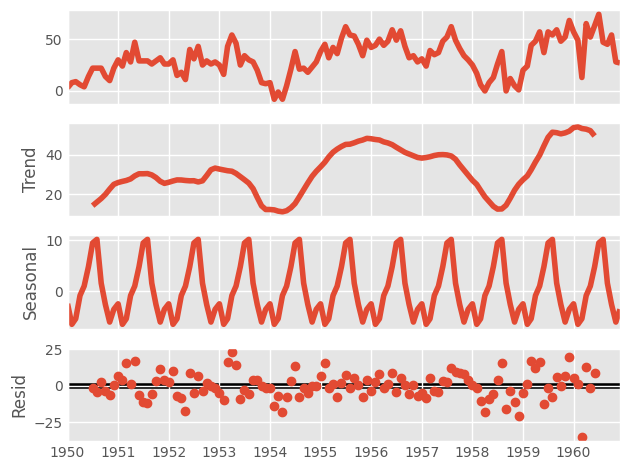

In [33]:
# Let's do differencing in SARIMA
"""
ARIMA models usually does not support very well the seasonality.
Therefore, some  seasonal pattern will  remaing
"""
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
diff_seasonal = df.diff(12).dropna()
decompose = sm.tsa.seasonal_decompose(diff_seasonal, period =12)
decompose.plot()
plt.show()
#

In [34]:
# Let's Carry out SARIMA Modelling
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df['Passengers Number'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  Passengers Number   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Wed, 21 Jan 2026   AIC                           1022.299
Time:                                    09:40:02   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

In [35]:
# Creating the 2nd SARIMA
model = SARIMAX(df['Passengers Number'], order=(2,1,1), seasonal_order=(2,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

"""
NB: Using different combinations we find out that the combine order (2,1,1) and seasonal_order(2,1,1,12) gives the best SARIMA model.

"""

                                     SARIMAX Results                                      
Dep. Variable:                  Passengers Number   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -499.551
Date:                            Wed, 21 Jan 2026   AIC                           1013.102
Time:                                    09:40:05   BIC                           1033.229
Sample:                                01-01-1949   HQIC                          1021.281
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5295      0.101      5.239      0.000       0.331       0.728
ar.L2          0.2920      0.093   

'\nNB: Using different combinations we find out that the combine order (2,1,1) and seasonal_order(2,1,1,12) gives the best SARIMA model.\n\n'

In [36]:
# 3rd SARIMA Model
model = SARIMAX(df['Passengers Number'], order=(0,1,1), seasonal_order=(0,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  Passengers Number   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -507.501
Date:                            Wed, 21 Jan 2026   AIC                           1021.003
Time:                                    09:40:06   BIC                           1029.628
Sample:                                01-01-1949   HQIC                          1024.507
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3087      0.068     -4.507      0.000      -0.443      -0.174
ma.S.L12      -0.1075      0.091   